## 使用PCA降噪

#### 回忆我们之前的例子

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)

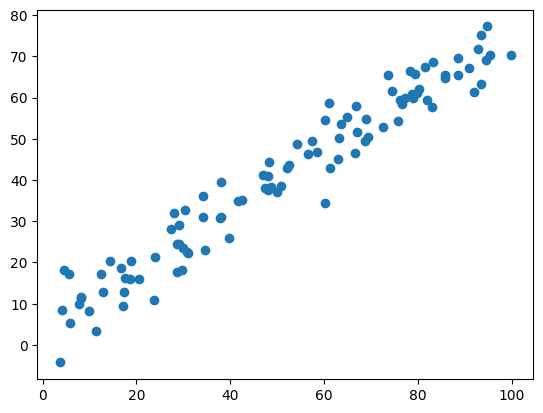

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

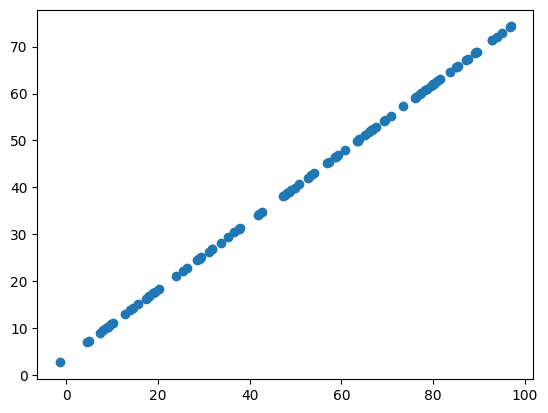

In [7]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

### 手写识别的例子

In [8]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [10]:
example_digits = noisy_digits[y==0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

In [11]:
example_digits.shape

(100, 64)

In [12]:
X.shape

(1797, 64)

In [13]:
y.shape

(1797,)

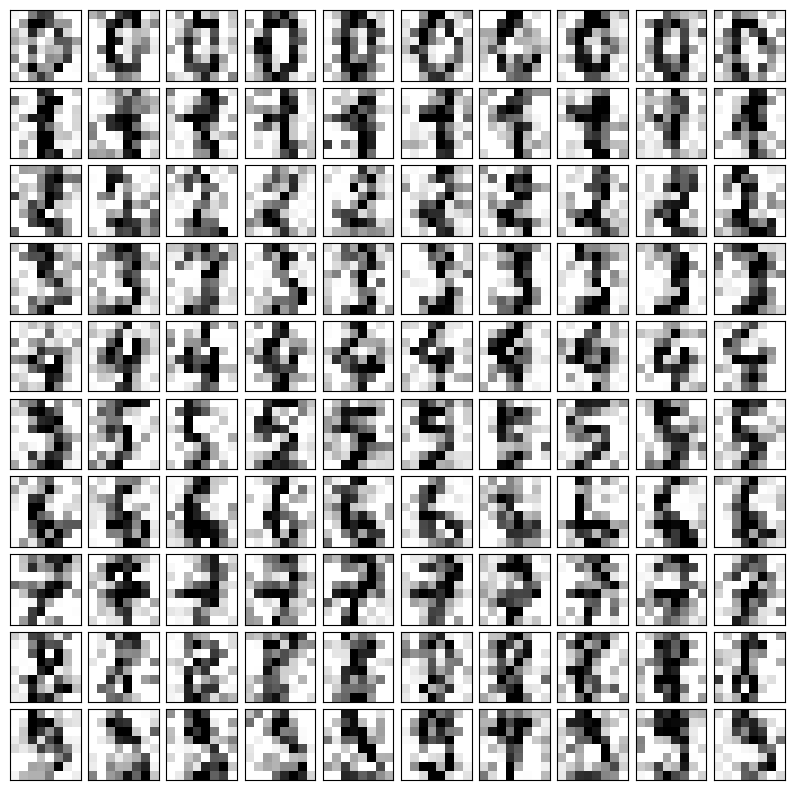

In [16]:
def plot_dights(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_dights(example_digits)

In [18]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [19]:
pca.n_components_

12

In [23]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

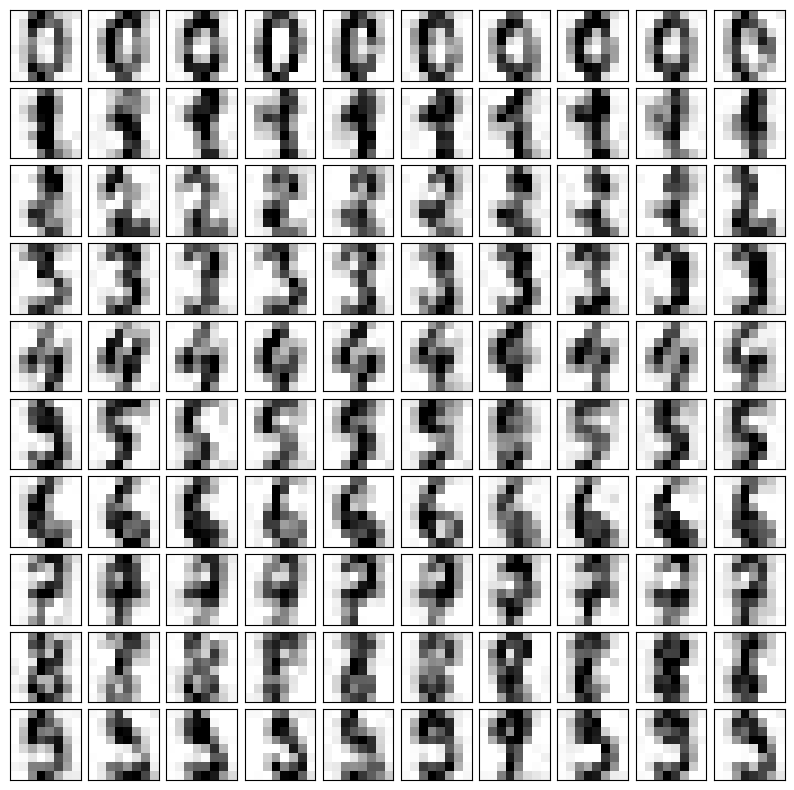

In [24]:
plot_dights(filtered_digits)